In [2]:
import os
import numpy as np
import pandas as pd

In [3]:
home = 'human/results/rsem/'
files = [a for a in os.listdir(home) if a[0]!='.']

tps = np.unique([int(a.split('_')[1]) for a in files])
rps = [1,2,3]

df0 = pd.read_csv(home+files[0], sep='\t')
ens2name = pd.read_csv('human.ens2name.cellranger.tsv', sep='\t')
def e2n(x):
    try:
        g = ens2name['MIR1302-2HG'][np.where(ens2name.ENSG00000243485==x)[0][0]]
    except:
        g = 'NA'
    return g
gene_col = df0.gene_id.map(e2n)

In [4]:
norm = lambda x: (x-x.min())/(x.max()-x.min())

data_dict = {}
for tp in tps:
    rplist = []
    for rp in rps:
        file = f'h_{tp}_{rp}.genes.results'
        if file in files:
            df = pd.read_csv(home+file, sep='\t')
            data_dict['t_'+str(tp)+'_'+str(rp)] = np.array(df.TPM)

In [5]:
data_dict['gene'] = gene_col

In [6]:
data_df = pd.DataFrame(data_dict)

In [7]:
data_df = data_df.set_index('gene')

In [8]:
data_df

,t_0_1,t_0_2,t_0_3,t_1_1,t_1_2,t_1_3,t_2_1,t_2_2,t_2_3,t_4_1,...,t_12_3,t_13_1,t_13_2,t_13_3,t_14_1,t_14_2,t_14_3,t_15_1,t_15_2,t_15_3
gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,100.62,101.23,89.83,115.77,115.39,100.70,83.86,90.07,87.65,59.06,...,79.86,75.47,78.03,72.13,79.88,91.13,89.63,87.80,95.31,96.68
TNMD,0.50,0.87,0.87,6.94,4.85,4.58,0.39,0.64,0.29,0.04,...,0.05,0.18,0.11,0.00,0.30,0.07,0.22,0.17,0.21,0.26
DPM1,88.59,85.53,83.87,76.92,77.16,68.69,76.20,76.30,80.21,70.56,...,65.83,55.45,55.88,58.43,55.99,63.03,59.04,57.86,57.78,63.14
SCYL3,5.33,5.24,5.16,4.56,4.56,4.40,5.53,5.32,6.64,5.05,...,6.75,7.37,7.16,6.53,5.78,5.72,6.66,6.70,7.12,6.60
C1orf112,25.25,22.74,21.37,28.07,26.50,24.90,25.43,25.70,22.42,20.89,...,13.70,10.16,10.89,10.11,11.67,14.05,13.66,10.31,11.48,12.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [101]:
data_df.to_csv('human_bulk_aggregated.csv')

In [103]:
import sys
sys.path.insert(0, '/camp/home/maizelr/working/Rory/python_scripts')
from simple_velocity import *
from utils import *

import_my_tools()
hdata_0 = load_human_velocity()

/camp/home/maizelr/.local/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}



        # base packages
        import sys
        import pandas as pd
        import numpy as np
        import scipy as sp      
        import matplotlib.pyplot as plt
        import pickle
        import seaborn as sns
        import pickle
        import adjustText

        # velocity packages
        import scanpy as sc
        import scvelo as scv
        import anndata as ann
        import dynamo as dyn
        import cellrank as cr

        # extra packages
        import plotly as pl
        import plotly.graph_objects as go
        import plotly.express as px
        import ipywidgets as ipy
        
Loading:  /camp/home/maizelr/working/Rory/transcriptomics/human_transcriptomics_analysis/data/new_human_velocity_20210121.loom
Variable names made unique.


In [153]:
def temporal_BROV_genes(data, species, n=2000):
    """ temporally stratified biologically relevant or variable genes"""
    gene_sets = []
    for time in data.obs.timepoint.unique():
        copy = data.copy()
        copy = copy[copy.obs.timepoint==time]
        scv.pp.filter_genes_dispersion(copy, n_top_genes=n)
        tp_genes = copy.var_names  
        gene_sets.append(tp_genes)
    hv_genes = set(gene_sets[0]).intersection(*gene_sets[1:])
    br_genes = gene_list('nt', species=species)
    genes = list(set(hv_genes).union(set(br_genes)))
    genes = list(set(genes).intersection(set(data.var_names)))
    print(len(genes), ' Genes Chosen')
    return genes

In [282]:
hdata = hdata_0.copy()
dom_data = hdata[[a in ['V3','MN'] for a in hdata.obs.domain],:]
# dom_genes = temporal_BROV_genes(dom_data, 'human', n=2000)
dom_genes = gene_list('nt', species='human', data=dom_data)

# dom_genes = ['SOX2','ELAVL3','STMN2','MAP2','NFIA','NFIB','ONECUT2','POU2F2','FABP7']

print('{0} Genes Total.'.format(len(dom_genes)))
dom_data = dom_data[:,dom_genes]

174 Genes Total.


In [281]:
dists

[0.6836414594764294,
 1.3928983090279439,
 1.3830004732937533,
 0.9272884187442066,
 0.4561205681934798,
 0.20382855246169937,
 0.11960039157229718,
 0.08955336268323623,
 0.05289824768022281,
 0.2547751793149983,
 0.158200221418684,
 0.2014524106604403,
 0.16449064471868674,
 0.21474767856650792,
 0.2648126508265547]

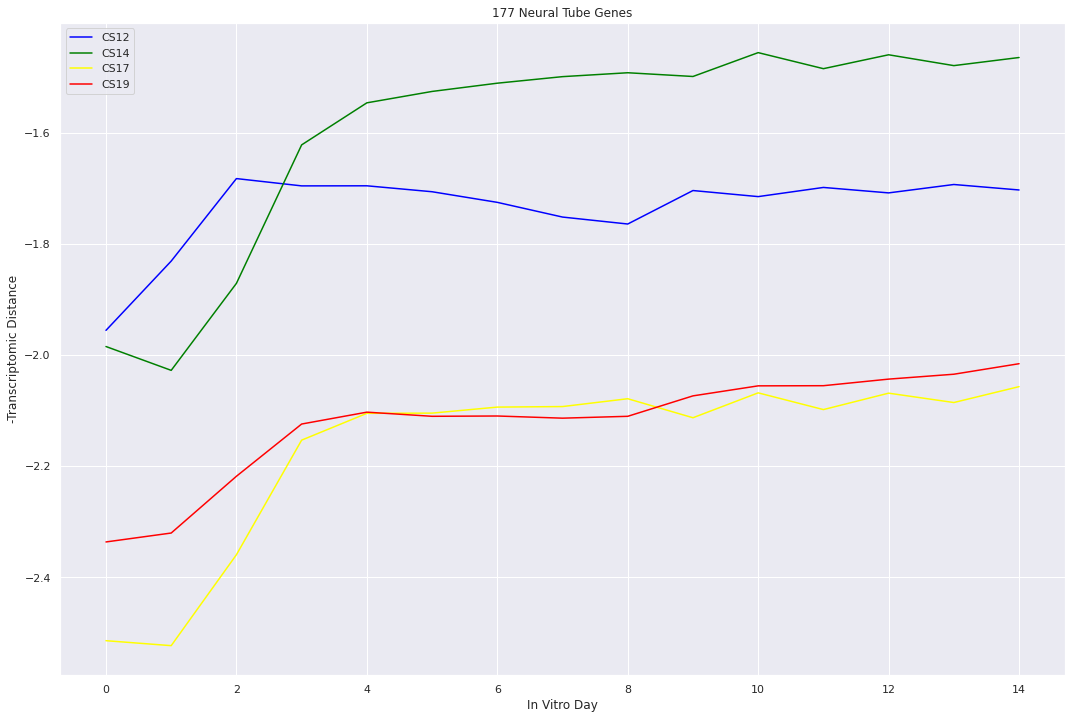

In [283]:
sns.set()
plt.figure(figsize=(18,12))
# axes = fig.subplots(2,2)
# axes = axes.flatten()
hd_df = data_df.loc[dom_genes]
cols = ['blue','green','yellow','red']
for i, tp in enumerate(dom_data.obs.timepoint.unique()):
    tp_data = dom_data[dom_data.obs.timepoint==tp]
    tp_exp = np.array(tp_data.X.sum(axis=0))[0]
    dists = []
    for t in hd_df.columns:
        d = np.linalg.norm(norm(hd_df[t]) - norm(tp_exp))
        dists.append(d)
#     ax = axes[i]
    plt.plot(np.arange(len(dists)),-np.array(dists), label=tp, color=cols[i])
    plt.xlabel('In Vitro Day')
    plt.ylabel('-Transcriptomic Distance')
plt.legend()
plt.title("177 Neural Tube Genes")
plt.show()


In [305]:
hdata = hdata_0.copy()
dom_data = hdata[[a in ['V3','MN','V2','V1','V0'] for a in hdata.obs.domain],:]
# dom_genes = temporal_BROV_genes(dom_data, 'human', n=2000)
# dom_genes = gene_list('nt', species='human', data=dom_data)

dom_genes = ['SOX2','ELAVL3','STMN2','MAP2','SOX1','OLIG2','NKX2-2','MNX1','NKX6-1',"NFIA","NFIB", "PAX6", "IRX3", "ISL1"]

print('{0} Genes Total.'.format(len(dom_genes)))
dom_data = dom_data[:,dom_genes]

14 Genes Total.


In [297]:
hd_df.columns[2:12]

Index(['t_2', 't_4', 't_5', 't_6', 't_7', 't_8', 't_9', 't_10', 't_11',
       't_12'],
      dtype='object')

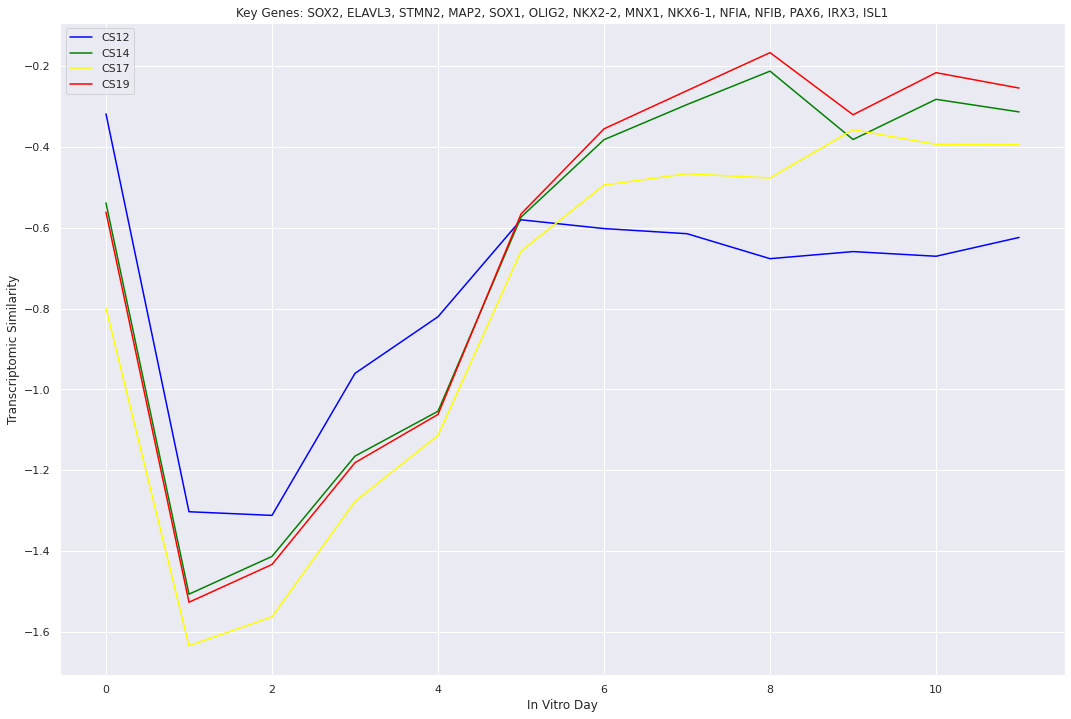

In [306]:
sns.set()
plt.figure(figsize=(18,12))
# axes = fig.subplots(2,2)
# axes = axes.flatten()
hd_df = data_df.loc[dom_genes]
cols = ['blue','green','yellow','red']
for i, tp in enumerate(dom_data.obs.timepoint.unique()):
    tp_data = dom_data[dom_data.obs.timepoint==tp]
    tp_exp = np.array(tp_data.X.sum(axis=0))[0]
    dists = []
    for t in hd_df.columns[:12]:
        d = np.linalg.norm(norm(hd_df[t]) - norm(tp_exp))
        dists.append(d)
#     ax = axes[i]
    plt.plot(np.arange(len(dists)),-np.array(dists), label=tp, color=cols[i])
    plt.xlabel('In Vitro Day')
    plt.ylabel('Transcriptomic Similarity')
plt.legend()
plt.title("Key Genes: "+ ", ".join(dom_genes))
plt.show()

In [264]:
len(list(set(data_df.index).intersection(hdata_0.var_names)))

33291

In [265]:
len(hdata_0.var_names)

33538

In [303]:
data_df

,t_0,t_1,t_2,t_4,t_5,t_6,t_7,t_8,t_9,t_10,t_11,t_12,t_13,t_14,t_15
gene,,,,,,,,,,,,,,,
TSPAN6,97.226667,110.620000,87.193333,61.773333,59.883333,63.616667,67.810000,67.900,75.250000,73.666667,70.566667,74.706667,75.210000,86.880000,93.263333
TNMD,0.746667,5.456667,0.440000,0.013333,0.033333,0.053333,0.076667,0.040,0.000000,0.086667,0.106667,0.140000,0.096667,0.196667,0.213333
DPM1,85.996667,74.256667,77.570000,73.540000,71.750000,67.903333,66.860000,60.965,70.190000,66.923333,59.946667,62.283333,56.586667,59.353333,59.593333
SCYL3,5.243333,4.506667,5.830000,5.243333,5.410000,5.946667,6.450000,6.450,8.136667,6.156667,6.860000,6.593333,7.020000,6.053333,6.806667
C1orf112,23.120000,26.490000,24.516667,18.870000,18.956667,18.226667,16.363333,14.565,12.786667,13.536667,14.386667,12.940000,10.386667,13.126667,11.403333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
